In [1]:
import tensorflow as tf

### Addition of a matrix and a vector and broadcasting 

$\boldsymbol{C} = \boldsymbol{A}+\boldsymbol{b} $ 

In [9]:
A = tf.constant([[1,2,3],[3,4,5]])
b = tf.constant([1,2,3])

c = A + tf.transpose(b)
e = A + b
with tf.Session() as sess:
    print sess.run(c)
    print sess.run(e)

[[2 4 6]
 [4 6 8]]
[[2 4 6]
 [4 6 8]]


### Matrix multiplication 

$\boldsymbol{C} = \boldsymbol{A}\boldsymbol{B} $ 

In [26]:
A = tf.constant([[1,2,3],[3,4,5]])
B = tf.constant([[1,2],[3,4],[5,6]])
C = tf.matmul(A,B)
print tf.shape(A)
print tf.shape(B)
with tf.Session() as sess:
    print sess.run(C)

Tensor("Shape_9:0", shape=(2,), dtype=int32)
Tensor("Shape_10:0", shape=(2,), dtype=int32)
[[22 28]
 [40 52]]


### Hadamard product or element-wise product 

$\boldsymbol{C} = \boldsymbol{A}\odot\boldsymbol{B} $ 

In [28]:
A = tf.constant([[1,2,3],[3,4,5]])
B = tf.constant([[1,2,3],[3,4,5]])
C = tf.mul(A,B)
print tf.shape(A)
print tf.shape(B)
with tf.Session() as sess:
    print sess.run(C)

Tensor("Shape_13:0", shape=(2,), dtype=int32)
Tensor("Shape_14:0", shape=(2,), dtype=int32)
[[ 1  4  9]
 [ 9 16 25]]


### Dot product 

$\textit{c} = \textit{x}^T\textit{y} $ 

In [34]:
x = tf.constant([1,2,3])
y = tf.constant([1,2,3])
c = tf.reduce_sum(tf.mul(x,y))
with tf.Session() as sess:
    print sess.run(c)

14


### Transpose of a Matrix product

${(\boldsymbol{A}\boldsymbol{B})}^T = \boldsymbol{B}^T \boldsymbol{A}^T $ 

In [35]:
A = tf.constant([[1,2,3],[3,4,5]])
B = tf.constant([[1,2],[3,4],[5,6]])
C = tf.transpose(tf.matmul(A,B))
D = tf.matmul(tf.transpose(B),tf.transpose(A))

with tf.Session() as sess:
    print sess.run(C)
    print sess.run(D)

Tensor("Shape_15:0", shape=(2,), dtype=int32)
Tensor("Shape_16:0", shape=(2,), dtype=int32)
[[22 40]
 [28 52]]
[[22 40]
 [28 52]]


In [49]:
#solve for 2x_1+3x_2=1 and 5x_1+1x_2 =0

A= tf.constant([[2.0,3.0],[5.0,1.0]])
b = tf.constant([1.0,0.0])
print tf.shape(tf.matrix_inverse(A))
print tf.shape(b)
x = tf.mul(tf.matrix_inverse(A),tf.transpose(b))
with tf.Session() as sess:
    print sess.run(x)

Tensor("Shape_30:0", shape=(2,), dtype=int32)
Tensor("Shape_31:0", shape=(1,), dtype=int32)
[[-0.07692308  0.        ]
 [ 0.38461539 -0.        ]]


## Linear Dependence and Span

Matrix vector multiplication as linear combination of scalar and vector.

$\boldsymbol{Ax} = \sum_i{x_i\boldsymbol{A}_{:,i}}$

## 2.5 Norm
Norm of a vector is measure of the size of the vector

$\|\boldsymbol{x}\|_p = \left(\sum_{\substack i}\left|x_i\right|^p\right)^{\frac{1}{p}}$

$p = 2$ is Euclidean norm

$max(\left|x_i\right|)$ is max norm

In [7]:
import numpy as np
x = tf.constant([1,2,-3],dtype="float32")
p = tf.placeholder("float32",shape=[1])
norm = tf.pow(tf.reduce_sum(tf.pow(tf.abs(x),p)),1/p)
with tf.Session() as sess:
    for i in xrange(1,10):
        print sess.run(norm,feed_dict={p:np.expand_dims(i,1)})

[ 6.]
[ 3.7416575]
[ 3.30192733]
[ 3.14634633]
[ 3.07738495]
[ 3.04301047]
[ 3.02466273]
[ 3.0144434]
[ 3.00858879]


$\textbf{Advantages}$ of squared $L^2$ norm is that the derivatives with repect to individual $x_i$ depends only on it. 

$\textbf{Disadvantage}$ is that it moves very slowly near zero. (illustrated below )

In [17]:
l = np.linspace(-5,5,50)
l_pow_2 = np.power(l,2)
l_abs = np.abs(l)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
sns.set_style("whitegrid")

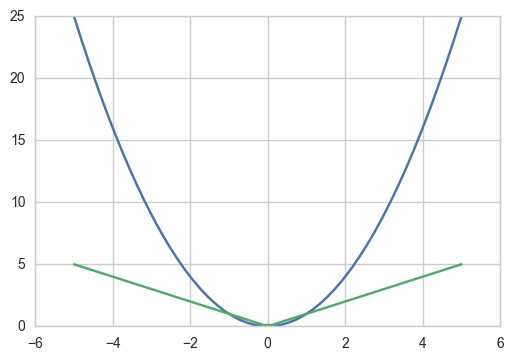

In [18]:
import seaborn as sns
plt.plot(l,l_pow_2)
plt.plot(l,l_abs)

In [15]:
l = np.linspace(-1.5,1.5,50)
l_pow_2 = np.power(l,2)
l_abs = np.abs(l)

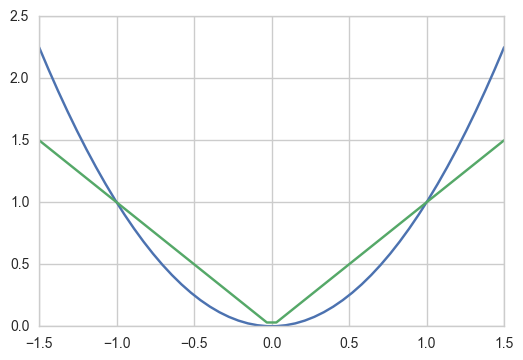

In [16]:
plt.plot(l,l_pow_2)
plt.plot(l,l_abs)

### Forbenius Norm
measure of size of a matrix 

$\|{\boldsymbol{A}}\|_{\boldsymbol{F}} = \sqrt{\sum_{i,j} A_{i,j}^2}$


In [23]:
A = tf.constant([[1,2,3],[3,4,5]],dtype="float32")

forbenius_norm = tf.sqrt(tf.reduce_sum(tf.mul(A,A)))
with tf.Session() as sess:
    print sess.run(forbenius_norm)

8.0


### Diagonal Matrix

In [27]:
with tf.Session() as sess:
    print sess.run(tf.diag([1,2,3,4]))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [32]:
#identity matrix
with tf.Session() as sess:
    print sess.run(tf.diag(tf.ones((1,3))[0]))

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [33]:
with tf.Session() as sess:
    print sess.run(tf.matrix_diag([1,2,3,4]))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [40]:
v = tf.constant([1,2,3,4],dtype="float32")
diag_A = tf.matrix_diag(tf.constant([1,2,3,4],dtype="float32"))
x = tf.constant([10,20,30,40],dtype="float32")
out = tf.mul(diag_A,x)
with tf.Session() as sess:
    print sess.run(out)
    print sess.run(tf.mul(v,x))
    print sess.run(tf.matrix_inverse(diag_A))

[[  10.    0.    0.    0.]
 [   0.   40.    0.    0.]
 [   0.    0.   90.    0.]
 [   0.    0.    0.  160.]]
[  10.   40.   90.  160.]
[[ 1.          0.          0.          0.        ]
 [ 0.          0.5         0.          0.        ]
 [ 0.          0.          0.33333334  0.        ]
 [ 0.          0.          0.          0.25      ]]


### Symmetric matrix

$\boldsymbol{A} =\boldsymbol{A}^T$

In [2]:
diag_A = tf.matrix_diag(tf.constant([1,2,3,4],dtype="float32"))
with tf.Session() as sess:
    print sess.run(diag_A)
    print sess.run(tf.transpose(diag_A))

[[ 1.  0.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  3.  0.]
 [ 0.  0.  0.  4.]]
[[ 1.  0.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  3.  0.]
 [ 0.  0.  0.  4.]]


### Unit vector (Vector with unit norm)

$\|\boldsymbol{x}\|_2 = 1$

### Orthogonal vectors

$\boldsymbol{x}^T \boldsymbol{y} = 0$

### Orthonormal vectors
$\|\boldsymbol{x}\|_2 = 1,$
$\|\boldsymbol{y}\|_2 = 1,$
$\boldsymbol{x}^T \boldsymbol{y} = 0$


### Orthogonal matrix 

$\boldsymbol{A}^T\boldsymbol{A} =\boldsymbol{A}\boldsymbol{A}^T = \boldsymbol{I}$

Orthogonal matrix has an advantage, calculating its inverse is just taking a transpose of it which is cheap to compute.

$\boldsymbol{A}^T = \boldsymbol{A}^{-1}$